### Experiment 2: Multiple processes, discrete, no temporal variability

In [3]:
import sys
sys.path.append("../")
import numpy as np
import matplotlib.pyplot as plt
from GraphDataset import GraphDataset, MultiGraphDataset
from creditlearning import CreditLearner

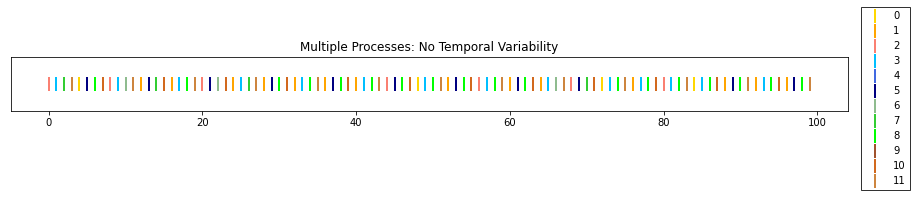

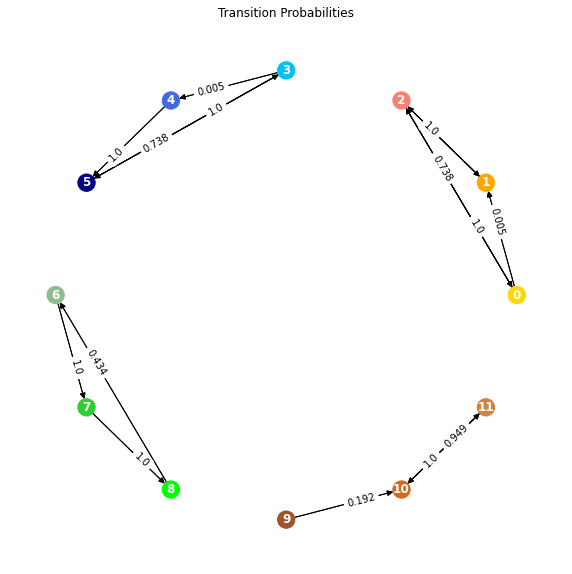

In [10]:
np.random.seed(51)

dt = 0.01

colourList = [['gold','orange','salmon'],
              ['deepskyblue','royalblue','navy'],
              ['darkseagreen','limegreen','lime'],
              ['sienna','chocolate','peru']]

def dist(x,i):
    if i==0:
        return np.array([0.05,0.75,0.2])
    elif i==1:
        return np.array([0.2,0.05,0.75])
    elif i==2:
        return np.array([0.75,0.2,0.05])
    
    


mean_scale = 4
var_scale = 1e-20

multigraph1 = MultiGraphDataset(numNodesList=[3,3,3,3],
                                pList=[0.4,0.4,0.4,0.4],
                                scaleList=[(mean_scale,var_scale),(mean_scale,var_scale),
                                           (mean_scale,var_scale),(mean_scale,var_scale)],
                                uniformTime=1,
                                dist=lambda x,i:np.random.power(0.5,x),
                                uniformTransitions=False,
                                dt=dt,colourList=colourList,
                                labelList=None)




multigraph1.generateEvents([500,500,500,500],offsets=[0,1,2,3],cutoff=dt,minTime=False,minSeparation=10*dt)
trainIndex = int(0.2*len(multigraph1.events))
multigraph1.plotEvents(start=0,end=100,
                       title=r'Multiple Processes: No Temporal Variability',
                       savefig=True,figname='figs_for_paper/experiment2/processStream.png')
#multigraph1.plotGraphs((4,4),withProbs=0)


multigraph1.plotComposedGraph((10,10),withProbs=True,title='Transition Probabilities',savefig=True,figname='figs_for_paper/experiment2/processGraph.png')


In [11]:
clgraph = CreditLearner(tau_min=0.01,tau_max=120,num_taustars=100,
                        delta_min=0.1,delta_max=30,k=8,dt=dt,
                        num_stimuli=multigraph1.totalNodes,
                        lrM=1,lrC=1,stimuli_labels=multigraph1.labels)
clgraph.prelearnM(f=multigraph1.eventsOneHot[:,trainIndex:],
                  event_times=multigraph1.timeInds[trainIndex:])
clgraph.learnCreditFast(f=multigraph1.eventsOneHot[:,trainIndex:],
                        event_times=multigraph1.timeInds[trainIndex:],
                        suppressM=True,adaptlr=True,verbose=500)

Reached event:  0 / 1598
Reached event:  500 / 1598
Reached event:  1000 / 1598
Reached event:  1500 / 1598


Accuracy C :  0.32160804020100503
Accuracy M :  0.5527638190954773
Baseline probability :  0.13819095477386933


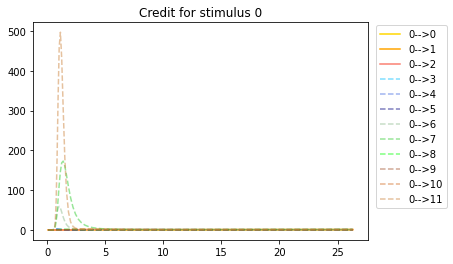

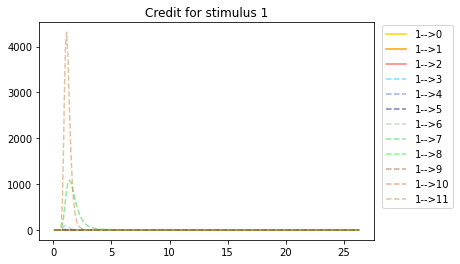

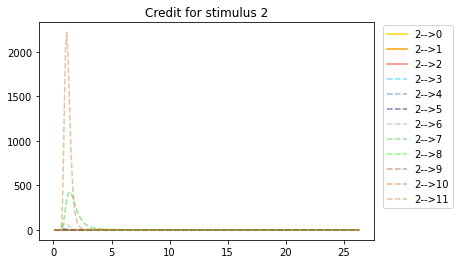

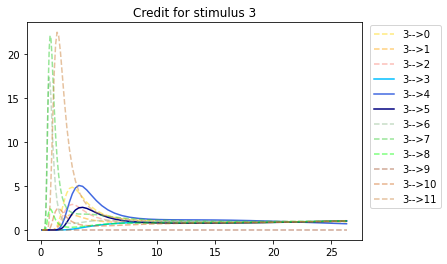

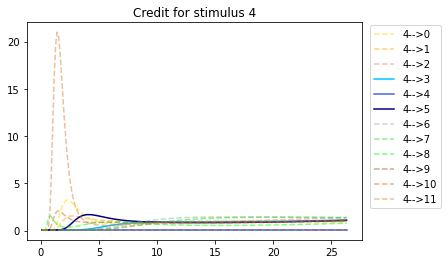

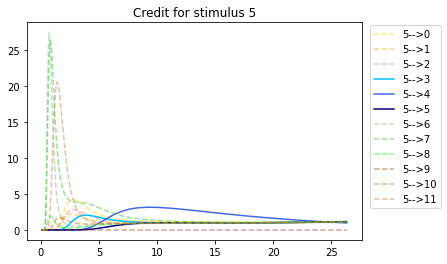

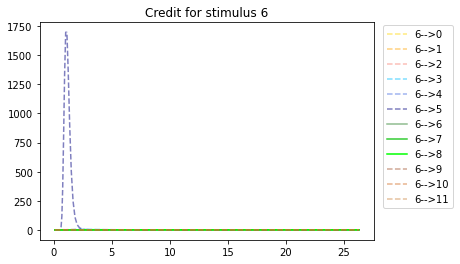

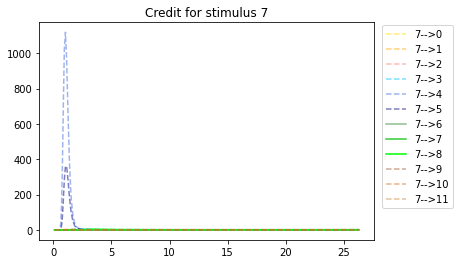

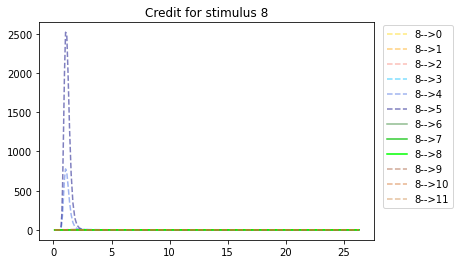

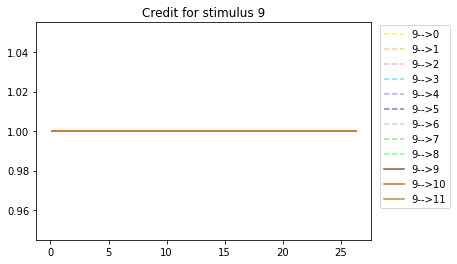

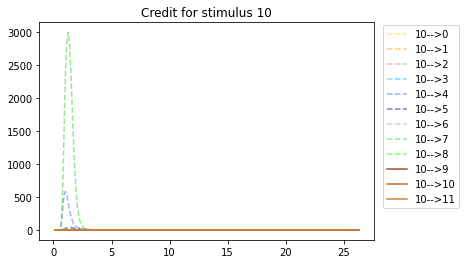

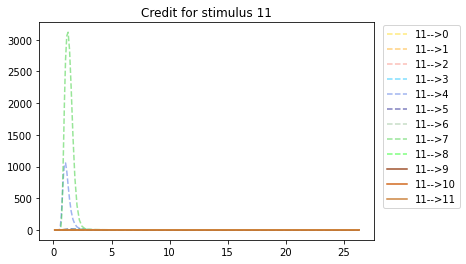

In [12]:
clgraph.plotCredit(scalebymax=0,colours=multigraph1.colours,savefig=True,process_labels=[0,0,0,1,1,1,2,2,2,3,3,3],prefix="figs_for_paper/experiment2/")
accuracy, accuracyM, accuracyBaseline, perplexity, perplexityM, perplexityBaseline = clgraph.predictOnSequence(f=multigraph1.eventsOneHot[:,:trainIndex],
                                        event_times=multigraph1.timeInds[:trainIndex],
                                        withMprediction=True, verbose=0,returnPredictions=False)


In [14]:
perplexityM

2.517733565307568

Reconstructed Graph for C
Number of edges =  3


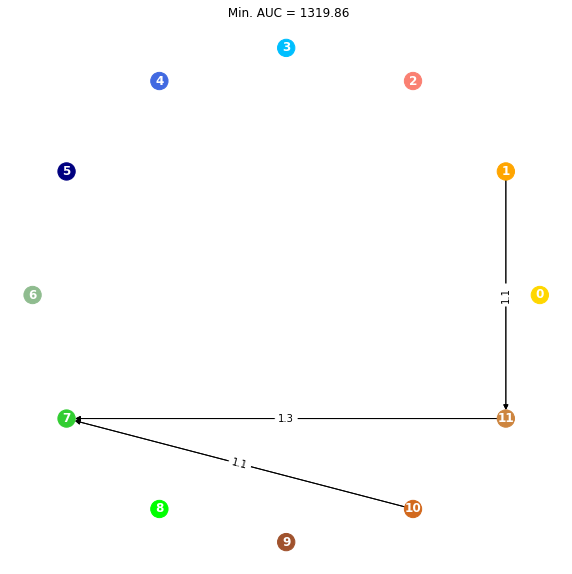

Reconstructed Graph for M
Number of edges =  4


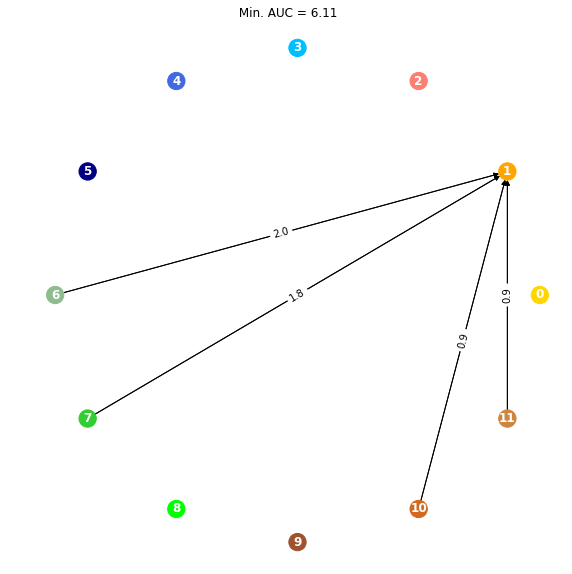

In [9]:
print("Reconstructed Graph for C")
clgraph.graphCredit(CorM='C',thresh_pct=0.9,colours=multigraph1.colours,figsize=(10,10),thickness_factor=1,usearea=1,savefig=True,prefix="figs_for_paper/experiment2/")
print("Reconstructed Graph for M")
clgraph.graphCredit(CorM='M',thresh_pct=0.95,colours=multigraph1.colours,figsize=(10,10),thickness_factor=1,savefig=False,prefix="figs_for_paper/experiment2/")